Final Transformation Matrix:
[[  0.33333333  -5.52948576  -2.42264973 -18.99358737]
 [  4.86281909   0.33333333   3.57735027  14.26153656]
 [ -3.57735027   2.42264973  27.          79.26794919]
 [  0.           0.           0.           1.        ]]


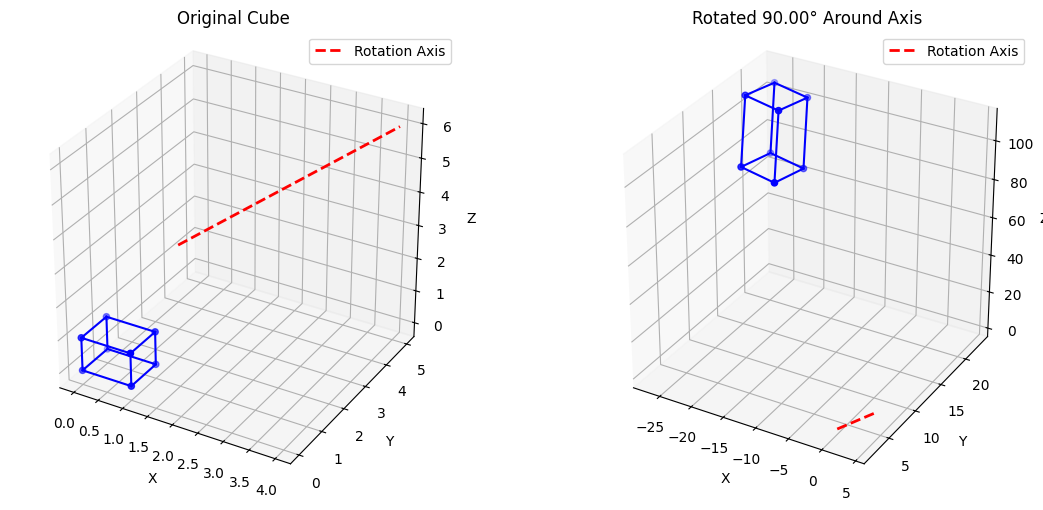

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_cube(vertices, edges, axis_line=None, ax=None, title=""):
    """Plot cube and rotation axis"""
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='blue')

    for edge in edges:
        ax.plot(
            [vertices[edge[0], 0], vertices[edge[1], 0]],
            [vertices[edge[0], 1], vertices[edge[1], 1]],
            [vertices[edge[0], 2], vertices[edge[1], 2]],
            'b-'
        )

    if axis_line is not None:
        ax.plot(
            [axis_line[0], axis_line[3]],
            [axis_line[1], axis_line[4]],
            [axis_line[2], axis_line[5]],
            'r--', linewidth=2, label='Rotation Axis'
        )
        ax.legend()

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.set_box_aspect([1, 1, 1])
    return ax

def translate_matrix(x, y, z):
    """Create translation matrix"""
    return np.array([
        [1, 0, 0, -x],
        [0, 1, 0, -y],
        [0, 0, 1, -z],
        [0, 0, 0,  1]
    ])

def rotate_x_matrix(sin_alpha, cos_alpha):
    """Create rotation matrix around X-axis"""
    return np.array([
        [1, 0, 0, 0],
        [0, cos_alpha, -sin_alpha, 0],
        [0, sin_alpha,  cos_alpha, 0],
        [0, 0, 0, 1]
    ])

def rotate_y_matrix(sin_beta, cos_beta):
    """Create rotation matrix around Y-axis"""
    return np.array([
        [cos_beta, 0, sin_beta, 0],
        [0, 1, 0, 0],
        [-sin_beta, 0, cos_beta, 0],
        [0, 0, 0, 1]
    ])

def rotate_z_matrix(theta):
    """Create rotation matrix around Z-axis"""
    return np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta),  np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def arbitrary_rotation_matrix(x1, y1, z1, x2, y2, z2, angle):
    """Create a composite matrix for arbitrary axis rotation"""
    dx  = x2 - x1
    dy  = y2 - y1
    dz  = z2 - z1
    v = math.sqrt(dx**2 + dy**2 + dz**2)
    
    a  = dx / v
    b  = dy / v
    c  = v
    d = math.sqrt(b**2 + c**2)

    sin_alpha = b / d
    cos_alpha = c / d
    sin_beta = a
    cos_beta = d

    T1 = translate_matrix(x1, y1, z1)
    Rx = rotate_x_matrix(sin_alpha, cos_alpha)
    Ry = rotate_y_matrix(sin_beta, cos_beta)
    Rz = rotate_z_matrix(angle)
    Ry_inv = rotate_y_matrix(-sin_beta, cos_beta)
    Rx_inv = rotate_x_matrix(-sin_alpha, cos_alpha)
    T2 = translate_matrix(-x1, -y1, -z1)

    composite = T1 @ Rx_inv @ Ry_inv @ Rz @ Ry @ Rx @ T2
    return composite

def create_cube():
    """Create cube vertices and edges"""
    vertices = np.array([
        [0, 0, 0, 1],
        [1, 0, 0, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [0, 1, 1, 1]
    ])
    edges = [
        [0, 1], [1, 2], [2, 3], [3, 0],
        [4, 5], [5, 6], [6, 7], [7, 4],
        [0, 4], [1, 5], [2, 6], [3, 7]
    ]
    return vertices, edges

def transform_vertices(vertices, matrix):
    """Apply transformation matrix to vertices"""
    return (matrix @ vertices.T).T


def main():
     # Create cube
    vertices, edges = create_cube()
    # Define rotation axis and angle
    x1, y1, z1 = 1, 2, 3
    x2, y2, z2 = 4, 5, 6
    angle = np.radians(90)

    # Get composite transformation matrix
    composite = arbitrary_rotation_matrix(x1, y1, z1, x2, y2, z2, angle)

    # Transform vertices using matrix multiplication
    transformed_vertices = transform_vertices(vertices, composite)

    fig = plt.figure(figsize=(12, 5))
    # Original cube
    ax1 = fig.add_subplot(121, projection='3d')
    plot_cube(vertices, edges, [x1, y1, z1, x2, y2, z2], ax1, "Original Cube")
    # Transformed cube
    ax2 = fig.add_subplot(122, projection='3d')
    plot_cube(transformed_vertices, edges, [x1, y1, z1, x2, y2, z2], ax2, f"Rotated {np.degrees(angle):.2f}° Around Axis")
    
    print("Final Transformation Matrix:")
    print(composite)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
